In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [11]:
#download data from https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD
gdp = pd.read_csv('WorldBank_per_capita_GDP.csv', sep=',', skiprows=4) 
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,36830.156611,36782.227117,37314.564389,37587.065942,38893.960556,40143.000266,39834.223903,31182.833881,NaN,NaN
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3365.684322,3503.826534,3533.336591,3627.474284,3670.891196,3761.035160,3814.846625,3659.272868,3881.592253,NaN
2,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2015.514775,2069.424022,2087.305323,1981.118069,2058.400221,2082.392197,2152.190243,2078.479082,NaN,NaN
3,Africa Western and Central,AFW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4013.196523,4208.731780,4139.323364,4069.005667,4115.645480,4231.321093,4335.409188,4241.522499,4474.970700,NaN
4,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7682.475646,8179.297828,7337.569901,7103.226249,7310.896551,7148.933253,6995.299736,6478.332182,6581.042021,NaN


In [12]:
#get data from https://www.heritage.org/index/explore.aspx?u=637966942306703209
ec_index = pd.read_excel('heritage-all-data.xlsx')

In [13]:
gdp.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2018              float64
2019              float64
2020              float64
2021              float64
Unnamed: 66       float64
Length: 67, dtype: object

In [14]:
ec_index.dtypes

Name                       object
Index Year                  int64
Overall Score              object
Property Rights            object
Government Integrity       object
Judicial Effectiveness     object
Tax Burden                float64
Government Spending        object
Fiscal Health              object
Business Freedom           object
Labor Freedom              object
Monetary Freedom           object
Trade Freedom             float64
Investment Freedom        float64
Financial Freedom         float64
dtype: object

In [16]:
#drop other columns besides Country, Index Year, and Score in EC Index, And Country and Last Year in GDP
ec_index = ec_index[['Name', 'Index Year', 'Overall Score']]
gdp = gdp[['Country Name', '2021']]

In [17]:
#rename the columns
ec_index.columns = ['Country', 'Year', 'Score']
gdp.columns = ['Country', 'Value']

In [18]:
#merge the two dataframes, on the values of Country to align the data. 
# exclude the Year column from ec_index and then remove rows with NaN values.
merged_data = pd.merge(gdp, ec_index, on='Country')
merged_data = merged_data[['Country', 'Value', 'Score']]
merged_data.dropna(axis=0, how='any', thresh=None, 
                   subset=None, inplace=True)

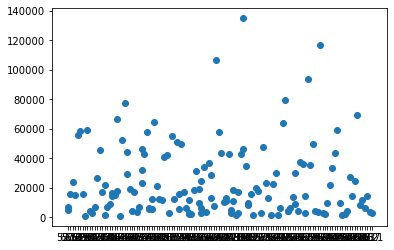

In [19]:
#plot
plt.scatter(merged_data.Score, merged_data.Value)

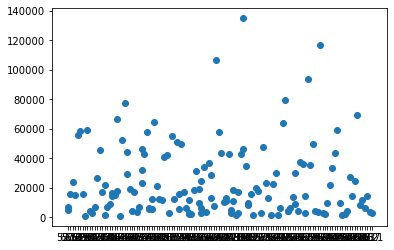

In [20]:
#alternatively
x = merged_data.Score
y = merged_data.Value
plt.scatter(x,y)

In [21]:
#add hover
import plotly.graph_objs as go
import plotly.express as px

In [22]:
fig = px.scatter(merged_data, x="Score", y="Value", log_x=True,
                 hover_data=["Country", "Score"])
fig.show()

In [26]:
fig = px.scatter(merged_data, x="Score", y="Value", 
                 trendline="ols", log_x=True,
                 hover_data=["Country", "Score"])
fig.show()

In [25]:
#alternative
def fit_line(x, y):

    x = x.to_numpy() # convert into numpy arrays
    y = y.to_numpy() # convert into numpy arrays

    A = np.vstack([x, np.ones(len(x))]).T 
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]

    return m, c
    
fig = px.scatter(merged_data, x="Score", y="Value",
                 log_x=True,
                 hover_data=["Country", "Score"])
# fit a linear model 
m, c = fit_line(x = merged_data.Score, 
                y = merged_data.Value)

# add the linear fit on top
fig.add_trace(
    go.Scatter(
        x=merged_data.Score,
        y=m*merged_data.Score + c,
        mode="lines",
        line=go.scatter.Line(color="red"),
        showlegend=False)
)

fig.show()

TypeError: No loop matching the specified signature and casting was found for ufunc lstsq_n